In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv", names=["x2", "x1", "y"])
df

,x2,x1,y
0,5.636857,0.664333,-3.712103
1,9.636857,1.264333,-7.741623
2,9.236857,6.864333,-9.806370
3,3.636857,3.564333,-3.656829
4,0.536857,-1.635667,0.444308
...,...,...,...
95,0.636857,0.964333,-0.240002
96,2.336857,-0.535667,-1.070106
97,3.236857,6.064333,-5.513606
98,0.436857,2.164333,-0.563969


In [3]:
x = df[["x2", "x1"]].to_numpy()
y = df["y"].to_numpy()

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
l1 = Lasso(.1).fit(x_train, y_train)
y_pred = l1.predict(x_test)

In [6]:
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(l1.coef_, l1.intercept_)

0.18900013182725012
0.9730867652459504
[-0.71892603 -0.48735449] 0.4647255269417121


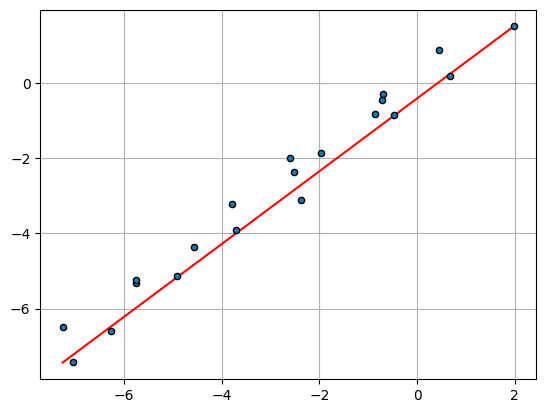

In [7]:
plt.scatter(y_test, y_pred, s=20, ec="black", zorder=3)
plt.plot((y_test.min(), y_test.max()), (y_pred.min(), y_pred.max()), c="r")

plt.grid()
plt.show()

In [8]:
l2 = Ridge(.1).fit(x_train, y_train)
y_pred = l2.predict(x_test)

In [9]:
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(l2.coef_, l2.intercept_)

0.19415562247357096
0.9723526338530498
[-0.73020147 -0.49871082] 0.5560056279778287


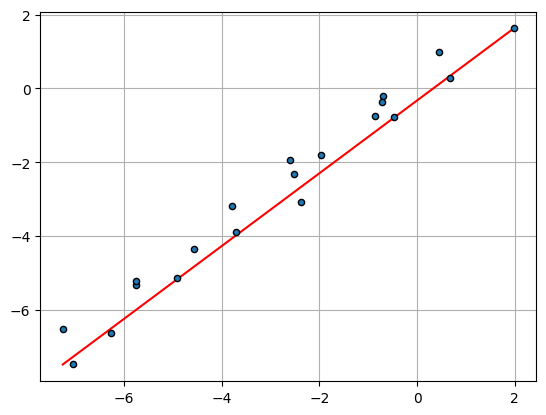

In [10]:
plt.scatter(y_test, y_pred, s=20, ec="black", zorder=3)
plt.plot((y_test.min(), y_test.max()), (y_pred.min(), y_pred.max()), c="r")

plt.grid()
plt.show()

In [11]:
alphas = [.001, .005, .1, .5, 1, 2]

Lasso
0.19422077409236121
0.9723433563949118
[-0.73019395 -0.49866538] 0.5558429358793564


Ridge
0.19422077409236121
0.9723433563949118
[-0.7303067  -0.49877894] 0.5567557184447152


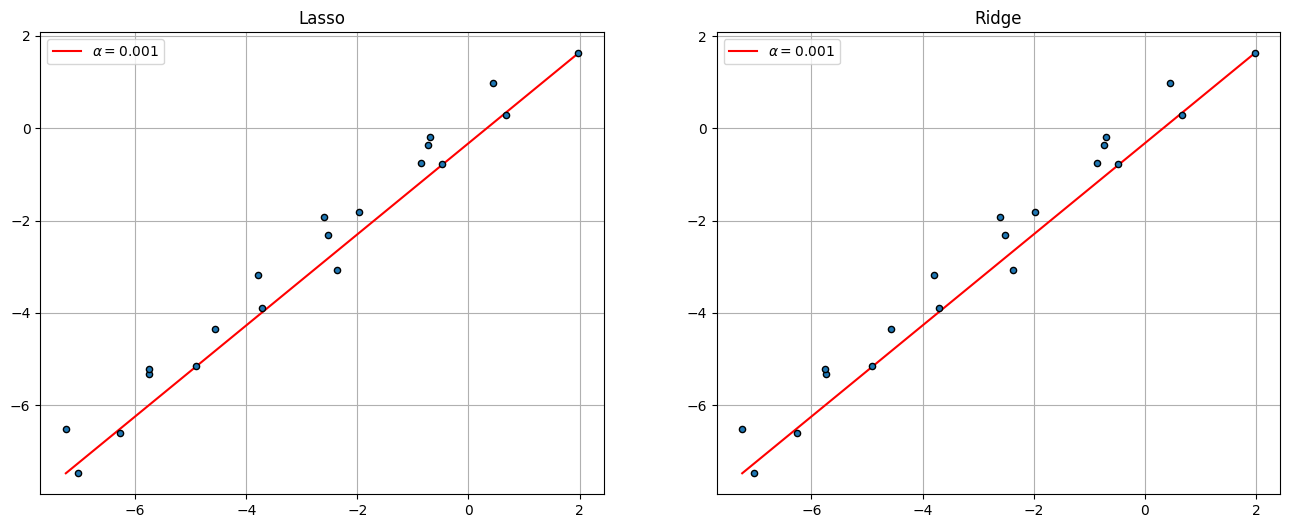

Lasso
0.19421813317937517
0.972343732455555
[-0.72973868 -0.49820838] 0.5521614244071289


Ridge
0.19421813317937517
0.972343732455555
[-0.73030245 -0.49877619] 0.5567254076191999


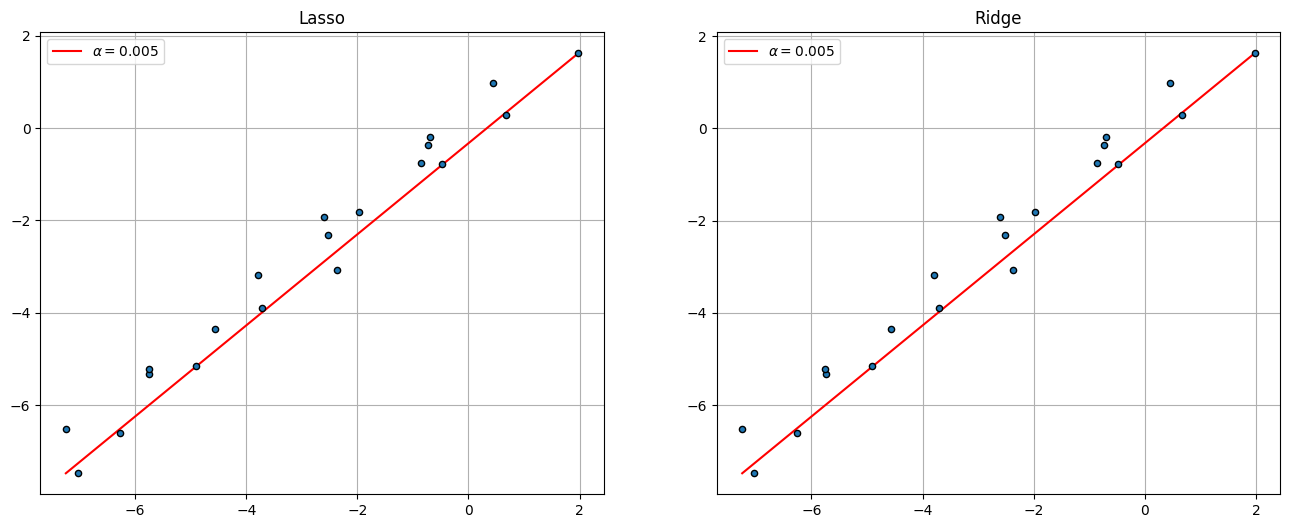

Lasso
0.19415562247357096
0.9723526338530498
[-0.71892603 -0.48735449] 0.4647255269417121


Ridge
0.19415562247357096
0.9723526338530498
[-0.73020147 -0.49871082] 0.5560056279778287


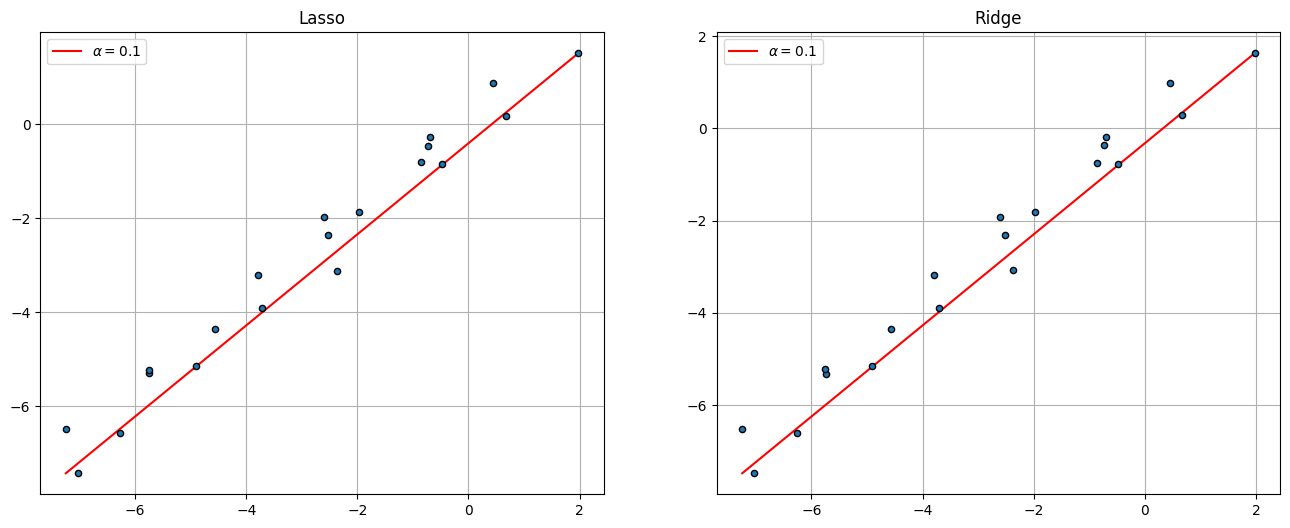

Lasso
0.1938968549515619
0.9723894818224095
[-0.67339909 -0.44165392] 0.09657437971890648


Ridge
0.1938968549515619
0.9723894818224095
[-0.72977659 -0.49843576] 0.5529771324575226


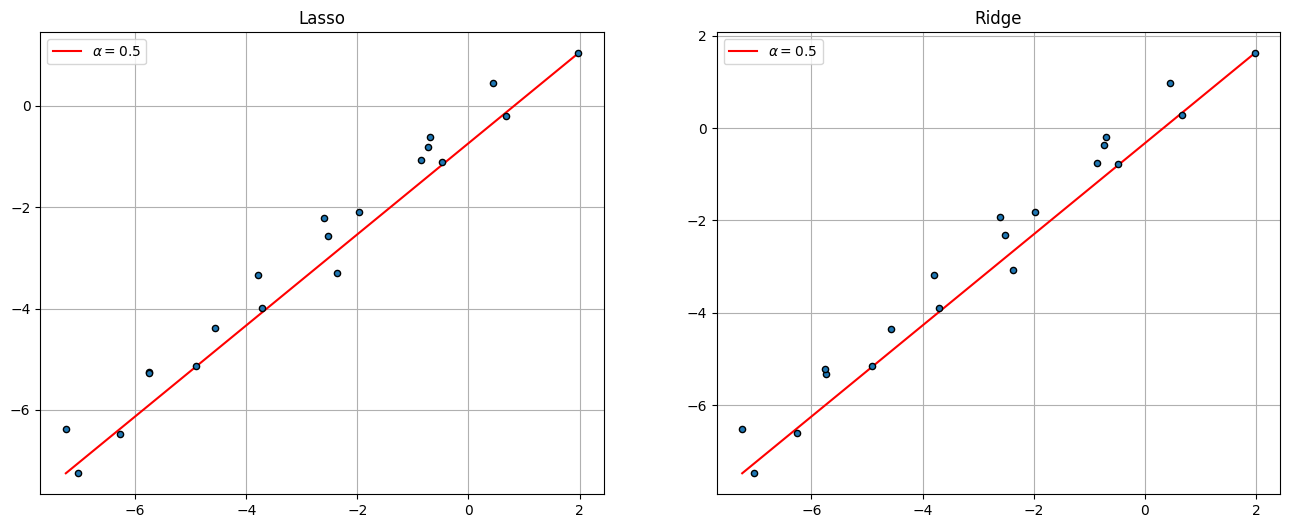

Lasso
0.19358344815066264
0.9724341103140649
[-0.61649041 -0.38452822] -0.3636145543096001


Ridge
0.19358344815066264
0.9724341103140649
[-0.72924619 -0.49809235] 0.5491964051433094


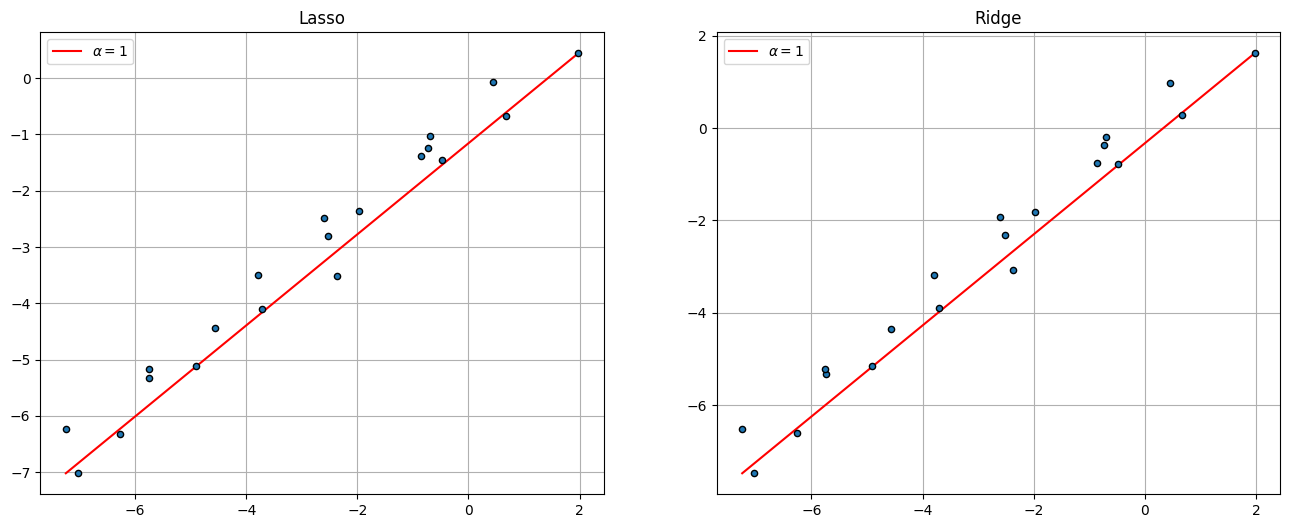

Lasso
0.19298996596413906
0.9725186209715646
[-0.50267306 -0.2702768 ] -1.283992422366612


Ridge
0.19298996596413906
0.9725186209715646
[-0.7281877  -0.49740695] 0.5416512129923312


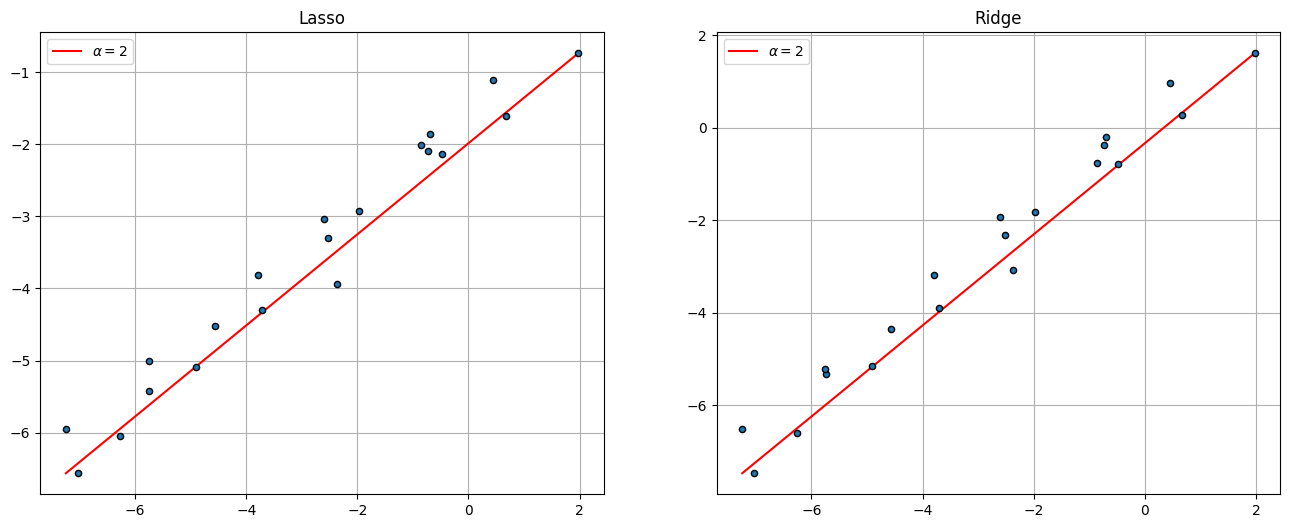

In [12]:
for alpha in alphas:
    l1 = Lasso(alpha).fit(x_train, y_train)
    l2 = Ridge(alpha).fit(x_train, y_train)

    y_pred_l1 = l1.predict(x_test)
    y_pred_l2 = l2.predict(x_test)

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    ax[0].set_title("Lasso")
    ax[1].set_title("Ridge")

    ax[0].scatter(y_test, y_pred_l1, s=20, ec="black", zorder=3)
    ax[1].scatter(y_test, y_pred_l2, s=20, ec="black", zorder=3)

    ax[0].plot((y_test.min(), y_test.max()), (y_pred_l1.min(), y_pred_l1.max()), c="r", label=rf"$\alpha={alpha}$")
    ax[1].plot((y_test.min(), y_test.max()), (y_pred_l2.min(), y_pred_l2.max()), c="r", label=rf"$\alpha={alpha}$")

    for i in range(2):
        ax[i].grid()
        ax[i].legend()

    print("Lasso")
    print(mean_squared_error(y_test, y_pred_l2))
    print(r2_score(y_test, y_pred_l2))
    print(l1.coef_, l1.intercept_)
    print("\n")
    print("Ridge")
    print(mean_squared_error(y_test, y_pred_l2))
    print(r2_score(y_test, y_pred_l2))
    print(l2.coef_, l2.intercept_)

    plt.show()

In [13]:
df = pd.read_csv("data.csv", names=["x2", "x1", "y"])

In [14]:
x = df[["x2", "x1"]]
y = df["y"]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
poly = PolynomialFeatures()

In [17]:
x_train_poly = poly.fit_transform(x_train)

In [18]:
x_pred = poly.transform(x_test)

In [19]:
model = LinearRegression().fit(x_train_poly, y_train)
y_pred = model.predict(x_pred)

In [20]:
print(r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred))

0.9717695828633469 0.19825014009372727


In [21]:
print(
    model.coef_,
    model.intercept_
)

[ 0.         -0.75590419 -0.54011225  0.00263189 -0.00117454  0.00987852] 0.5730472119254042


In [22]:
model = Lasso(.1).fit(x_train_poly, y_train)
y_pred = model.predict(x_pred)

In [23]:
print(r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred))

0.9620381908273208 0.2665895424167738


In [24]:
print(
    model.coef_,
    model.intercept_
)

[ 0.         -0.51703245 -0.42008312 -0.01575786 -0.01244961 -0.        ] -0.02957209304859365


In [25]:
model = Ridge(.1).fit(x_train_poly, y_train)
y_pred = model.predict(x_pred)

In [26]:
print(r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred))

0.9718181210278006 0.19790927733366742


In [27]:
print(
    model.coef_,
    model.intercept_
)

[ 0.         -0.75347074 -0.53911085  0.00243934 -0.00127125  0.00979478] 0.567163369254633
